In [92]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [41]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [42]:
data_train = data_train.drop("id", axis=1)

In [43]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data_train.columns if data_train[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data_train[var].isnull().mean(), 3),  ' % missing values')

In [44]:
# list of numerical variables
num_vars = [var for var in data_train.columns if data_train[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data_train[num_vars].head()

Number of numerical variables:  7


,bin_0,bin_1,bin_2,ord_0,day,month,target
0,0,0,0,2,2,2,0
1,0,1,0,1,7,8,0
2,0,0,0,1,7,2,0
3,0,1,0,1,2,1,1
4,0,0,0,1,7,8,0


In [45]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

[]

In [46]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data_train[var].unique())<20 and var not in ["target"] or year_vars+['id']]

print('Number of discrete variables: ', len(discrete_vars))
# let's visualise the discrete variables
data_train[discrete_vars].drop(["target"], axis=1).head()

Number of discrete variables:  7


,bin_0,bin_1,bin_2,ord_0,day,month
0,0,0,0,2,2,2
1,0,1,0,1,7,8
2,0,0,0,1,7,2
3,0,1,0,1,2,1
4,0,0,0,1,7,8


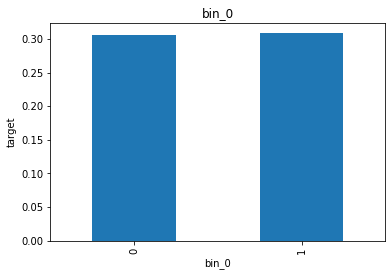

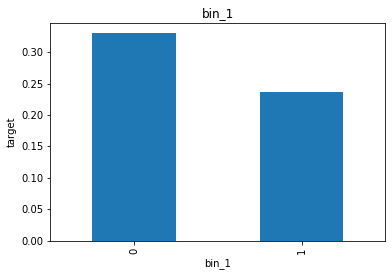

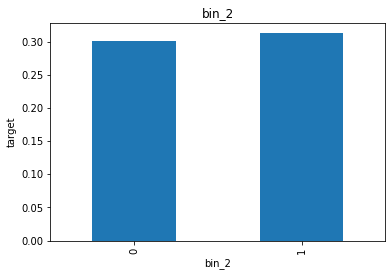

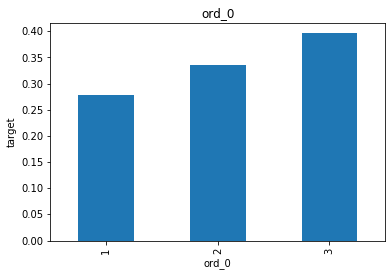

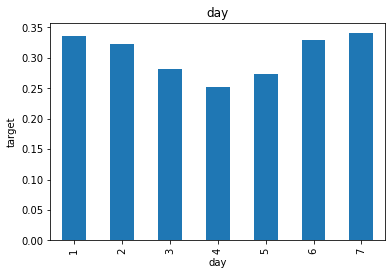

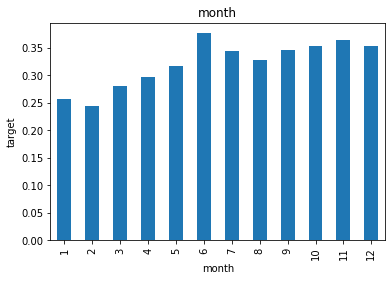

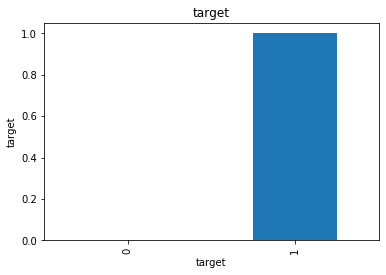

In [47]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('target')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data_train, var)

In [9]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  0


In [48]:
# let's visualise the continuous variables
data_train[cont_vars].head()

""
0
1
2
3
4


In [49]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data_train, var)

In [50]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data_train[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data_train, var)

In [51]:
### Categorical variables

cat_vars = [var for var in data_train.columns if data_train[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  17


In [52]:
# let's visualise the values of the categorical variables
data_train[cat_vars].head()

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,Grandmaster,Cold,h,D,kr
1,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,Grandmaster,Hot,a,A,bF
2,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,Expert,Lava Hot,h,R,Jc
3,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,Grandmaster,Boiling Hot,i,D,kW
4,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,Grandmaster,Freezing,a,R,qP


In [53]:
data_train = data_train.drop(["nom_5","nom_6","nom_7","nom_8","nom_9","ord_5"], axis=1)
data_test = data_test.drop(["nom_5","nom_6","nom_7","nom_8","nom_9", "ord_5"], axis=1)

In [54]:
### Categorical variables

cat_vars = [var for var in data_train.columns if data_train[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  11


In [55]:
for var in cat_vars:
    print(var, len(data_train[var].unique()), ' categories')

bin_3 2  categories
bin_4 2  categories
nom_0 3  categories
nom_1 6  categories
nom_2 6  categories
nom_3 6  categories
nom_4 4  categories
ord_1 5  categories
ord_2 6  categories
ord_3 15  categories
ord_4 26  categories


In [56]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['target'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data_train, var, 0.01))
    print()


Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

ord_3
m    0.001093
Name: target, dtype: float64

ord_4
M    0.00053
N    0.00722
Name: target, dtype: float64



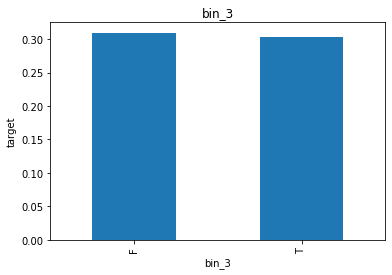

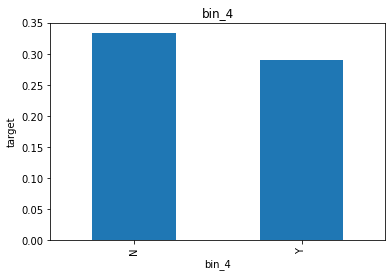

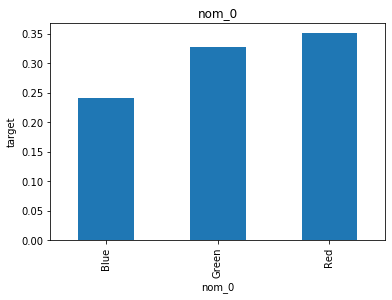

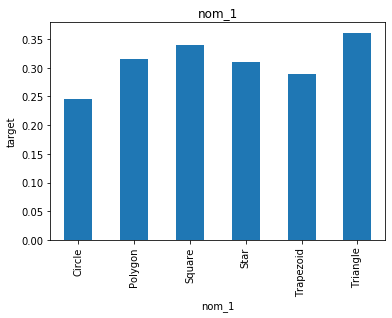

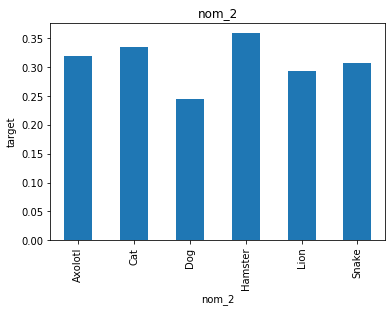

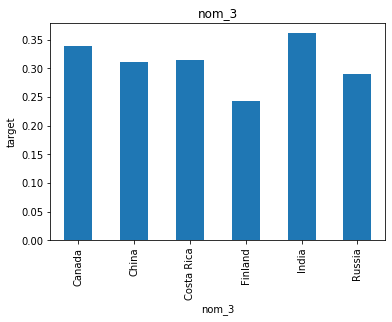

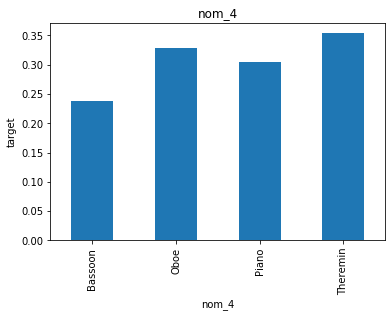

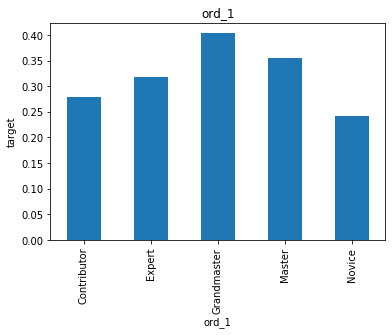

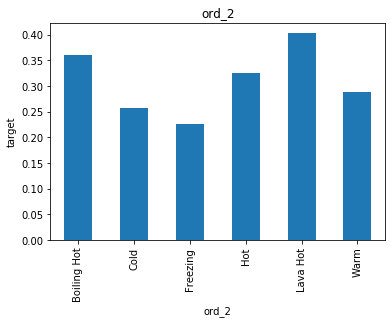

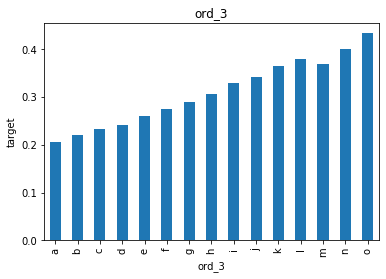

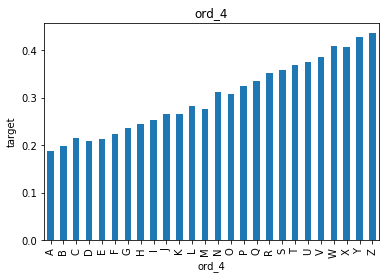

In [57]:
for var in cat_vars:
    analyse_discrete(data_train, var)

In [58]:
# let's capture the categorical variables first
cat_vars = [var for var in data_train.columns if data_train[var].dtype == 'O']

In [59]:
cat_vars

['bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4']

In [60]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['target'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(data_train, var, 0.01)
    data_train[var] = np.where(data_train[var].isin(frequent_ls), data_train[var], 'Rare')
    data_test[var] = np.where(data_test[var].isin(frequent_ls), data_test[var], 'Rare')

In [61]:
# this function will assign discrete values to the strings of the variables, 
# so that the smaller value corresponds to the smaller mean of target

def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [62]:
for var in cat_vars:
    replace_categories(data_train, data_test, var, 'target')

In [63]:
# check absence of na
[var for var in data_train.columns if data_train[var].isnull().sum()>0]

[]

In [64]:
# check absence of na
[var for var in data_test.columns if data_test[var].isnull().sum()>0]

[]

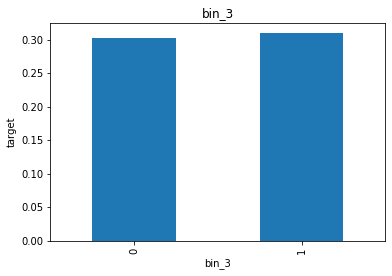

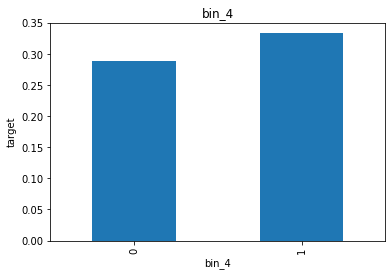

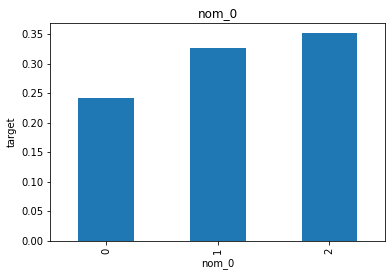

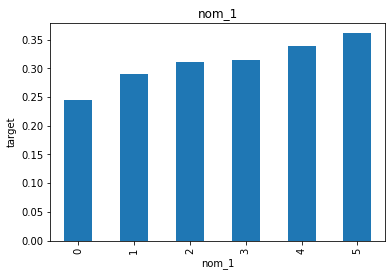

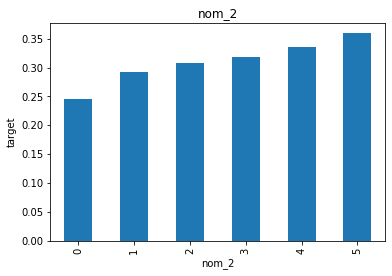

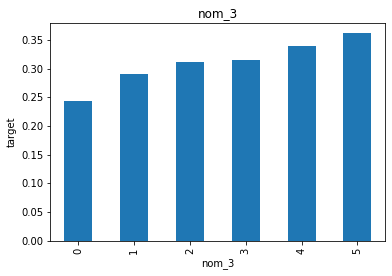

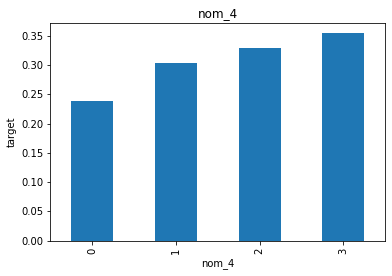

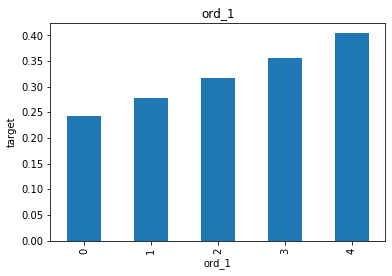

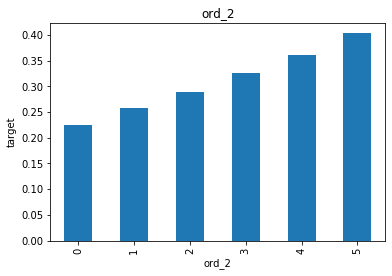

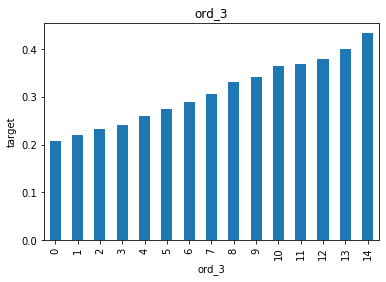

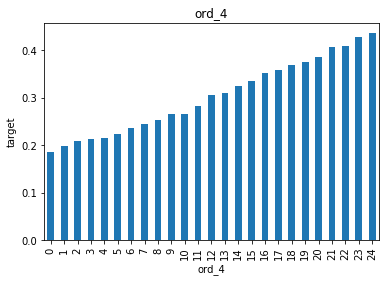

In [65]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('target')
    plt.show()
    
for var in cat_vars:
    analyse_vars(data_train, var)

In [66]:
train_vars = [var for var in data_train.columns if var not in ['id', 'target']]
len(train_vars)

17

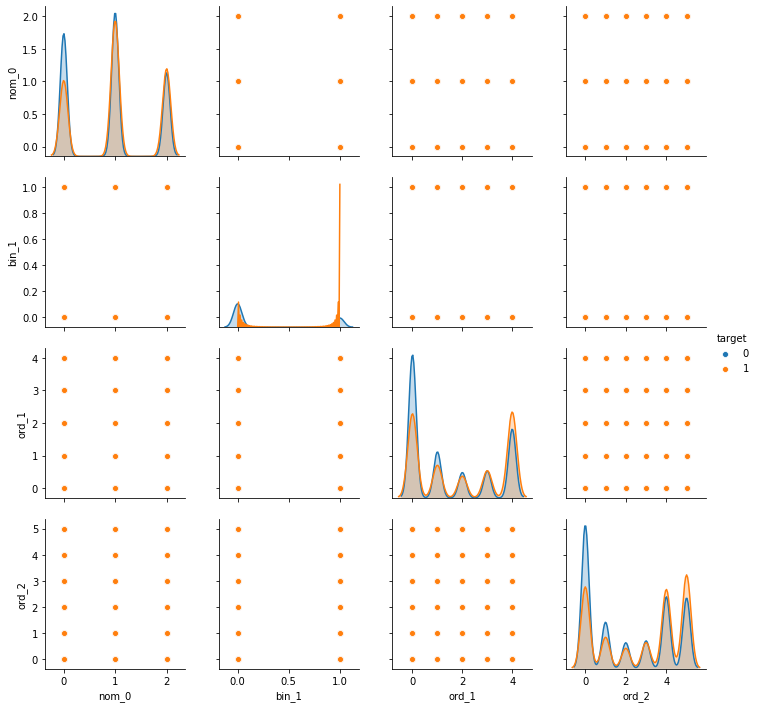

In [34]:
sns.pairplot(data_train, hue = 'target', vars = selected_features )

In [67]:
selected_features= ["nom_0", "bin_1", "ord_1", "ord_2", "ord_3", "ord_4", "month"]

In [68]:
X_train=data_train[selected_features]
y_train=data_train["target"]

In [69]:
X_test=data_test[selected_features]

In [95]:
#Modelo de Regresión Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
print('Precisión Regresión Logística: {}'.format(lr.score(X_train, y_train)))

C:\Users\Ulises Cabrera\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precisión Regresión Logística: 0.71775


In [39]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.6233766666666667


In [94]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred2 = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 0.87638


In [80]:
y_test=data["target"]

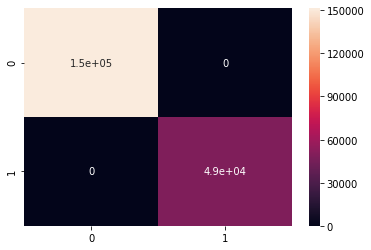

In [83]:
y_predict = algoritmo.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [72]:
data_test["target"] = Y_pred2

In [73]:
data_test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,day,month,target
0,300000,0,0,1,0,0,0,5,3,0,1,2,0,2,9,14,5,11,0
1,300001,0,0,0,0,1,2,4,1,4,1,1,3,5,12,0,7,5,1
2,300002,1,0,1,1,0,0,4,0,2,1,2,2,0,0,6,1,12,0
3,300003,0,0,1,0,0,2,2,4,2,1,1,1,5,1,15,2,3,0
4,300004,0,1,1,1,1,2,1,0,2,1,3,4,5,12,22,4,11,0


In [74]:
data = pd.DataFrame({"id": data_test["id"], 
                     "target": data_test["target"]}
                   )

In [75]:
data.head()

,id,target
0,300000,0
1,300001,1
2,300002,0
3,300003,0
4,300004,0


In [76]:
data.to_csv("cat-in-the-dat_prediction.csv", index= False)